# Energy Predictor Data Cleaning

_17 August 2024, 09:15_

I am using this notebok specifically to prepapre and preprocess my data for the houshold energy prediction project

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('For_Cleaning.csv')
df.head()

In [ ]:
#Drop the unnamed column
try:
    del df['Unnamed: 0']

except:
    pass

df.head()


## Handling Missing Values

In [ ]:
#Which columns have how many missing values
df.isna().sum()

In [ ]:
#Figure out the significancy of the missing values in each column by calculating % missing values
(df.isna().sum()/len(df)) * 100

(0.3 - 0.45)% missing values in a column is not significant. For weather data it seems there are specific dates without records throughout the entire dataframe. The 97.7% missing actually do not exist. for now I will  just leave them like that. Since the rest of the missing are quite insignificant, I will fill in the blank space with the mean.

In [ ]:
#Set apart numerical columns
num_cols = df.select_dtypes(include='number')
num_cols.head()


In [ ]:
df[num_cols.columns] = df[num_cols.columns].fillna(num_cols.mean())

In [ ]:
df.isna().sum()

Now taking a look at he non_numerical columns

In [ ]:
df['precipType'].unique()

In [ ]:
#back fill
df['precipType'] = df['precipType'].bfill()

In [ ]:
df['precipType'].unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labler = LabelEncoder()



In [ ]:
df['precipType'] = labler.fit_transform(df['precipType'])
df['precipType']

In [ ]:
df['precipType'].unique()

Successfully transformed!

In [ ]:
df.info()

In [ ]:
#Transform date column to date type
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

In [ ]:
#Exploring Summary col
df['summary'].unique()


The summary column is mostly useless for this project


In [ ]:
df = df.drop('summary',axis=1)

In [ ]:
df.head()

In [ ]:
df['Holidays'].unique()

In [ ]:
#Correct use of apostrophe
df['Holidays'] = df['Holidays'].apply(lambda s: s.replace('?', "'") if isinstance(s, str) and '?' in s else s)

In [ ]:
df['Holidays'].fillna('Not a Holiday',inplace=True)

In [ ]:
df['Holidays'].unique()

In [ ]:
#Eliminate substitute holidays
df['Holidays'] = df['Holidays'].apply(lambda s: s.replace('(substitute day)','').strip() if isinstance(s, str) and '(substitute day)' in s else s.strip())

In [ ]:
df['Holidays'].unique()

In [ ]:
#Exploring Holidays.
from sklearn.preprocessing import OneHotEncoder
oneencoder = OneHotEncoder()
encoded = df['Holidays'].values.reshape(-1,1)


In [ ]:

encoded = oneencoder.fit_transform(encoded)


In [ ]:
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded, columns=["holiday_" + holiday for holiday in oneencoder.categories_[0]])


In [ ]:
encoded_df.rename(columns={"holiday_Not a Holiday":"Not a Holiday"})

In [ ]:
try:
    df = df.join(encoded_df)
except:
    pass
df

In [ ]:
df.info()

In [ ]:
#Exploring the tarriffs column
df['stdorToU'].unique()

In [ ]:
from sklearn.preprocessing import LabelEncoder
tar_labler = LabelEncoder()

In [ ]:
df['stdorToU'] = tar_labler.fit_transform(df['stdorToU'])

In [ ]:
df['stdorToU'].unique()

In [ ]:
df

In [ ]:
#Exploring Acorns
df['Acorn'].unique()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder#To maintain Acorns order
col = df['Acorn']
od_encoder = OrdinalEncoder(categories=[[ 'ACORN-','ACORN-A', 'ACORN-B', 'ACORN-C', 'ACORN-D', 'ACORN-E',
       'ACORN-F', 'ACORN-G', 'ACORN-H', 'ACORN-I', 'ACORN-J', 'ACORN-K',
       'ACORN-L', 'ACORN-M', 'ACORN-N', 'ACORN-O', 'ACORN-P', 'ACORN-Q',
       'ACORN-U']])

In [ ]:
df['Acorn'] = od_encoder.fit_transform(df[['Acorn']])

In [ ]:
df['Acorn']= df['Acorn'].astype('int32')

In [ ]:
df.info()

In [ ]:
#Exploring Acorn grouped
df['Acorn_grouped'].unique()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
order = OrdinalEncoder(categories=[['ACORN-', 'Affluent',  'Comfortable', 'Adversity', 'ACORN-U']])

In [ ]:
df['Acorn_grouped'] = order.fit_transform(df[['Acorn_grouped']])

In [ ]:
df['Acorn_grouped'].astype('Int32')

In [ ]:
df.info()

In [ ]:
df

The 'Holidays' column is now obsolete

In [ ]:
df = df.drop('Holidays',axis=1)

Now I will try to extract more features from the 'Date' column:

In [ ]:

df['Day'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()




In [ ]:
# Define a function to map month to season in the Uk
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Apply the function to get the season
df['Season'] = df['Date'].apply(get_season)

In [ ]:
df

In [ ]:
#OneHotEncoder Shortcuts
df = pd.get_dummies(df, columns=['Season'], prefix='Season',dtype='Int32',sparse=False)
df = pd.get_dummies(df, columns=['Month'], prefix='Month',dtype='Int32',sparse=False)
df = pd.get_dummies(df, columns=['Day'], prefix='Day',dtype='Int32',sparse=False)

In [ ]:
df

In [ ]:
df.head()

In [ ]:
df.columns

Varible Normalisation for weather Features

In [ ]:
weather_cols = ['temperatureMax','windBearing','windSpeed','dewPoint','cloudCover','pressure','visibility','humidity','uvIndex','temperatureMin','moonPhase']

In [ ]:
#Normalize using MinMax Scaling
for col in weather_cols:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    

df

In [ ]:
df.info()

In [ ]:
sparce_cols = ['holiday_Boxing Day',                                    
'holiday_Christmas Day' ,                                
'holiday_Early May bank holiday' ,                       
'holiday_Easter Monday',                                 
'holiday_Good Friday'     ,                              
"holiday_New Year's Day"  ,                            
'holiday_Not a Holiday'    ,                            
"holiday_Queen's Diamond Jubilee (extra bank holiday)",  
'holiday_Spring bank holiday'   ,                       
'holiday_Summer bank holiday' ]

sparce_cols

In [ ]:
for col in sparce_cols:
    df[col] = df[col].astype('Int32')
    
df.info()

In [ ]:
df.head()

In [ ]:
df.describe()

# Exploratory Data Analysis (EDA)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df = df.drop(columns=['Household_id'])
df.set_index('Date',inplace=True)

In [ ]:
corr = df.corr()

In [ ]:
#Correlation heatmap
plt.figure(figsize=(40,40))
sns.heatmap(corr, cmap = 'Wistia', annot= True)

In [69]:
corr['energy_sum']

temperatureMax                                         -0.169618
windBearing                                            -0.013559
dewPoint                                               -0.150229
cloudCover                                              0.055069
windSpeed                                               0.035099
pressure                                               -0.037410
precipType                                              0.054943
visibility                                             -0.057777
humidity                                                0.078772
uvIndex                                                -0.144634
temperatureMin                                         -0.161946
moonPhase                                              -0.011029
energy_sum                                              1.000000
Acorn                                                  -0.156019
Acorn_grouped                                          -0.131428
stdorToU                 

feature Selection

In [78]:
f_list = []
for f in dict(corr['energy_sum']):
    if abs(corr['energy_sum'][f]) > 0.05:
        f_list.append(f)
print(f_list)

['temperatureMax', 'dewPoint', 'cloudCover', 'precipType', 'visibility', 'humidity', 'uvIndex', 'temperatureMin', 'energy_sum', 'Acorn', 'Acorn_grouped', 'Season_Summer', 'Season_Winter', 'Month_August', 'Month_December', 'Month_February', 'Month_January', 'Month_July', 'Month_June']


In [95]:
features = df[f_list].drop(columns=['temperatureMax','Acorn_grouped'],axis=1)
features

,dewPoint,cloudCover,precipType,visibility,humidity,uvIndex,temperatureMin,energy_sum,Acorn,Season_Summer,Season_Winter,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June
Date,,,,,,,,,,,,,,,,,
2012-10-12,0.546271,0.29,0,0.826840,0.745455,0.285714,0.460275,7.098,1,0,0,0,0,0,0,0,0
2012-10-13,0.466224,0.20,0,0.748918,0.672727,0.285714,0.322765,11.087,1,0,0,0,0,0,0,0,0
2012-10-14,0.555642,0.31,0,0.771284,0.745455,0.142857,0.371658,13.223,1,0,0,0,0,0,0,0,0
2012-10-15,0.575947,0.39,0,0.801587,0.563636,0.142857,0.561497,10.257,1,0,0,0,0,0,0,0,0
2012-10-16,0.691527,0.42,0,0.773449,0.709091,0.142857,0.551566,9.769,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-02-24,0.541585,0.50,0,0.831169,0.563636,0.142857,0.520626,2.587,18,0,1,0,0,1,0,0,0
2014-02-25,0.503709,0.62,0,0.765512,0.636364,0.142857,0.474790,0.720,18,0,1,0,0,1,0,0,0
2014-02-26,0.413120,0.26,0,0.831169,0.545455,0.285714,0.374714,1.051,18,0,1,0,0,1,0,0,0


In [96]:
corr = features.corr()

In [97]:
corr['energy_sum']

dewPoint         -0.150229
cloudCover        0.055069
precipType        0.054943
visibility       -0.057777
humidity          0.078772
uvIndex          -0.144634
temperatureMin   -0.161946
energy_sum        1.000000
Acorn            -0.156019
Season_Summer    -0.126006
Season_Winter     0.128372
Month_August     -0.073414
Month_December    0.069994
Month_February    0.055103
Month_January     0.072399
Month_July       -0.067077
Month_June       -0.056010
Name: energy_sum, dtype: float64

<Axes: >

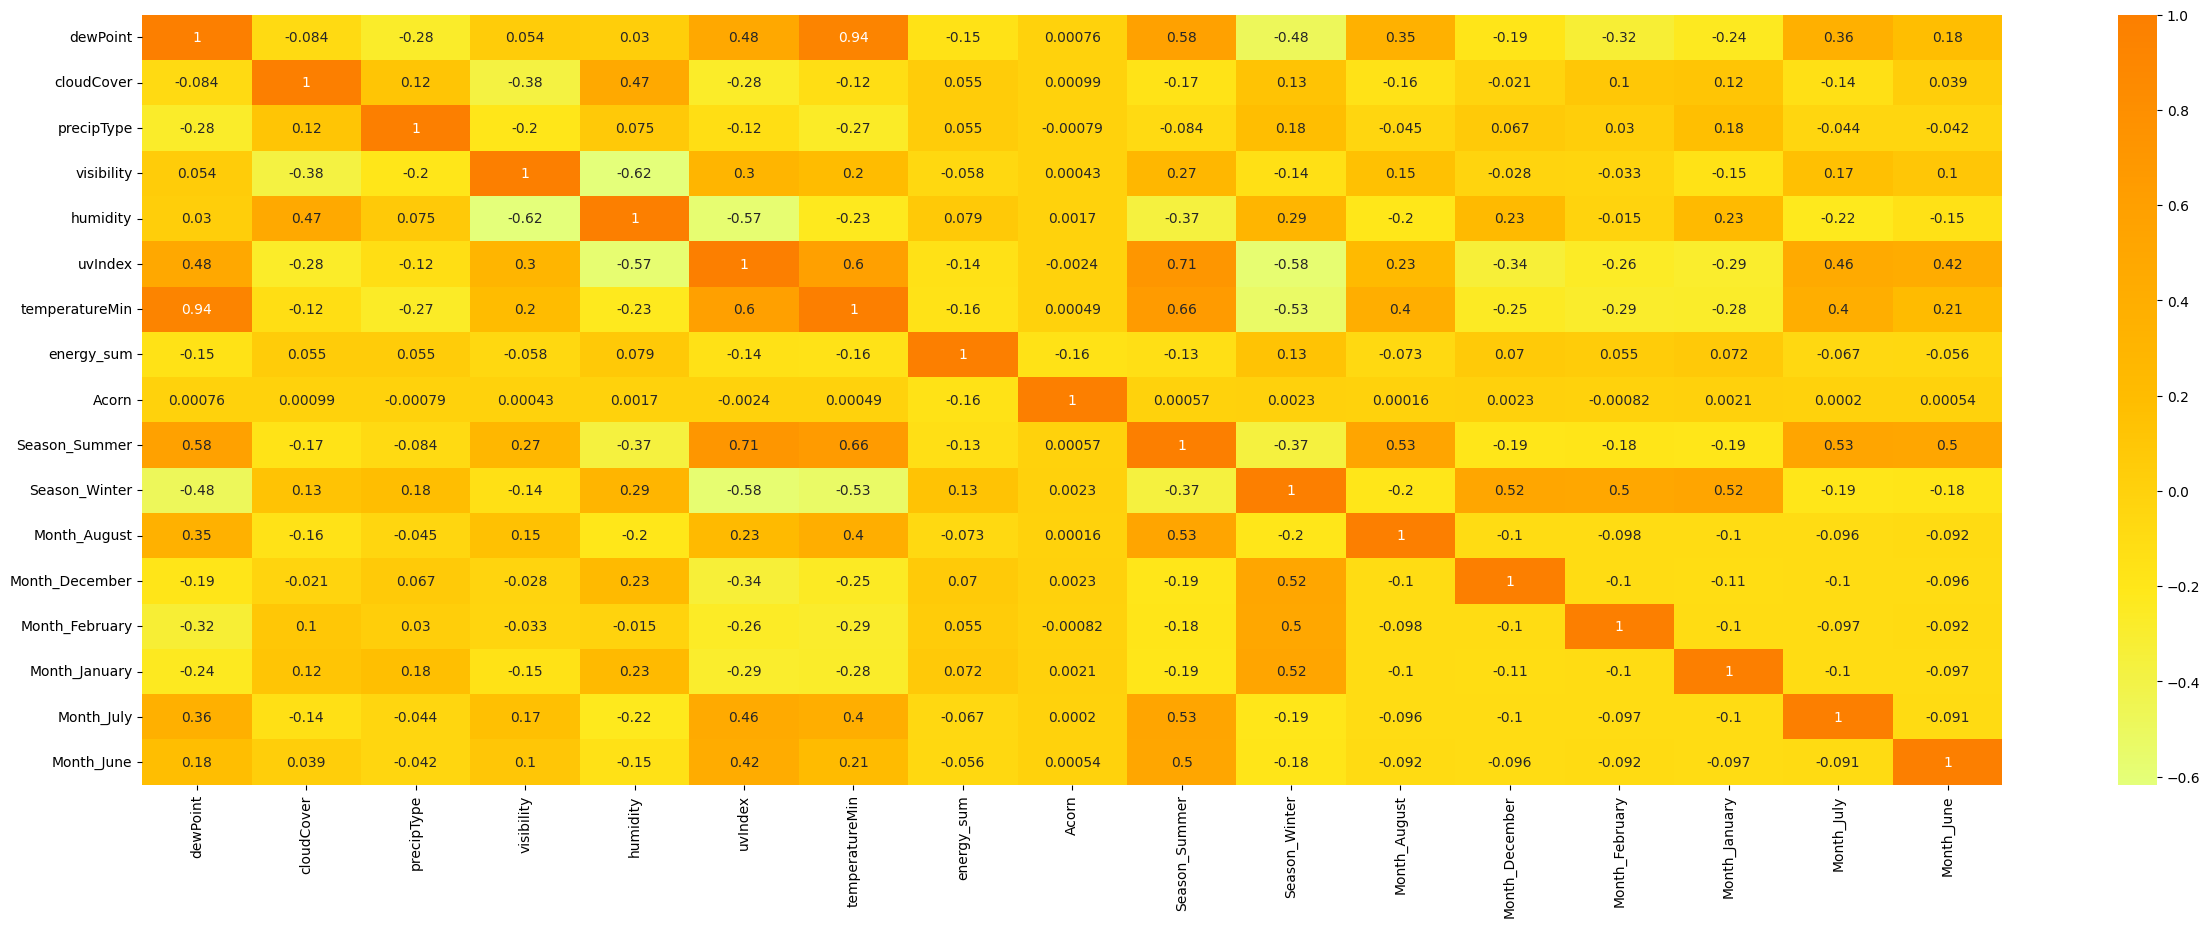

In [98]:
#Correlation heatmap
plt.figure(figsize=(30,10))
sns.heatmap(corr, cmap = 'Wistia', annot= True)

In [102]:
x = features.drop('energy_sum',axis=1)
y = features['energy_sum']

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
model = LinearRegression()

In [105]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

In [106]:
model.fit(X_train,y_train)

LinearRegression()

In [108]:
y_pred = model.predict(X_test)
y_pred

array([13.21591517, 12.0013456 , 13.15530678, ...,  7.86883064,
        8.98566227,  9.32609077])

In [109]:
r2_score(y_test,y_pred)

0.05645308572182672